# Pre processing & Training Data Development

## 1. Imports

In [135]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

pd.options.display.max_rows = 15

## 2. Load Data

In [136]:
patient = pd.read_csv('../data/Patient_data_cleaned.csv')
patient.head()

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,hospital_death,AgeGroup
0,68.0,22.732803,0,Caucasian,M,180.3,Floor,admit,CTICU,0.541667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,0,60-80
1,77.0,27.421875,0,Caucasian,F,160.0,Floor,admit,Med-Surg ICU,0.927778,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,0,60-80
2,25.0,31.952749,0,Caucasian,F,172.7,Accident & Emergency,admit,Med-Surg ICU,0.000694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,0,20-40
3,81.0,22.635548,1,Caucasian,F,165.1,Operating Room / Recovery,admit,CTICU,0.000694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,0,80-100
4,67.0,27.555611,0,Caucasian,M,190.5,Accident & Emergency,admit,Med-Surg ICU,0.000694,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,0,60-80


## 3. Explore the Data

In [137]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83249 entries, 0 to 83248
Data columns (total 80 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            83249 non-null  float64
 1   bmi                            83249 non-null  float64
 2   elective_surgery               83249 non-null  int64  
 3   ethnicity                      83249 non-null  object 
 4   gender                         83249 non-null  object 
 5   height                         83249 non-null  float64
 6   icu_admit_source               83249 non-null  object 
 7   icu_stay_type                  83249 non-null  object 
 8   icu_type                       83249 non-null  object 
 9   pre_icu_los_days               83249 non-null  float64
 10  weight                         83249 non-null  float64
 11  apache_2_diagnosis             83249 non-null  float64
 12  apache_3j_diagnosis            83249 non-null 

### 3.1 Check the object and int type of data if they are ordinal data

In [138]:
patient.select_dtypes(['object','int']).nunique()

elective_surgery          2
ethnicity                 6
gender                    2
icu_admit_source          5
icu_stay_type             3
icu_type                  8
apache_post_operative     2
apache_3j_bodysystem     11
hospital_death            2
AgeGroup                  5
dtype: int64

In [139]:
col_list=patient.select_dtypes(['object','int']).columns

In [140]:
for col in col_list:
    value_counts=patient[col].value_counts()
    print(value_counts) 

elective_surgery
0    68109
1    15140
Name: count, dtype: int64
ethnicity
Caucasian           65345
African American     8573
Other/Unknown        4055
Hispanic             3516
Asian                1017
Native American       743
Name: count, dtype: int64
gender
M    44979
F    38270
Name: count, dtype: int64
icu_admit_source
Accident & Emergency         49801
Operating Room / Recovery    16779
Floor                        13937
Other Hospital                2190
Other ICU                      542
Name: count, dtype: int64
icu_stay_type
admit       78363
transfer     4447
readmit       439
Name: count, dtype: int64
icu_type
Med-Surg ICU    45659
MICU             7265
Neuro ICU        6869
CCU-CTICU        6415
SICU             4856
CSICU            4375
Cardiac ICU      4312
CTICU            3498
Name: count, dtype: int64
apache_post_operative
0    66226
1    17023
Name: count, dtype: int64
apache_3j_bodysystem
Cardiovascular          27343
Neurological            11047
Sepsis        

We can see that only the AgeGroup is the ordinal feature and we should apply label encoding on this column and apply one hot encoding on the rest categorical features.

## 4. Feature Engineering

### 4.1 Label Encoding
For the AgeGroup column, we use label encoding to transform the original categorical feature into a group of number.

In [141]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Apply label encoding to AgeGroup column in the list
patient['Age_group_encoded'] = label_encoder.fit_transform(patient['AgeGroup'])
patient=patient.drop('AgeGroup',axis=1)

In [142]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83249 entries, 0 to 83248
Data columns (total 80 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            83249 non-null  float64
 1   bmi                            83249 non-null  float64
 2   elective_surgery               83249 non-null  int64  
 3   ethnicity                      83249 non-null  object 
 4   gender                         83249 non-null  object 
 5   height                         83249 non-null  float64
 6   icu_admit_source               83249 non-null  object 
 7   icu_stay_type                  83249 non-null  object 
 8   icu_type                       83249 non-null  object 
 9   pre_icu_los_days               83249 non-null  float64
 10  weight                         83249 non-null  float64
 11  apache_2_diagnosis             83249 non-null  float64
 12  apache_3j_diagnosis            83249 non-null 

### 4.2 One hot Encoding
We use one-hot encoding to transform the rest of the categorical features.

In [143]:
#columns need to be encoded
col_list=col_list.tolist()
col_list.remove('AgeGroup')
col_list.remove('hospital_death')

In [144]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(patient[col_list])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(col_list))

one_hot_df.head(3)

,elective_surgery_0,elective_surgery_1,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_F,gender_M,...,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [145]:
patient_encoded = pd.concat([patient.drop(columns=col_list),one_hot_df], axis=1)
patient_encoded.head(3)

,age,bmi,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,arf_apache,gcs_eyes_apache,gcs_motor_apache,...,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma
0,68.0,22.732803,180.3,0.541667,73.9,113.0,502.01,0.0,3.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,77.0,27.421875,160.0,0.927778,70.2,108.0,203.01,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,25.0,31.952749,172.7,0.000694,95.3,122.0,703.03,0.0,3.0,6.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## 5. Scale the data

In [156]:
X=patient_encoded.drop('hospital_death', axis=1)
y=patient_encoded[['hospital_death']]

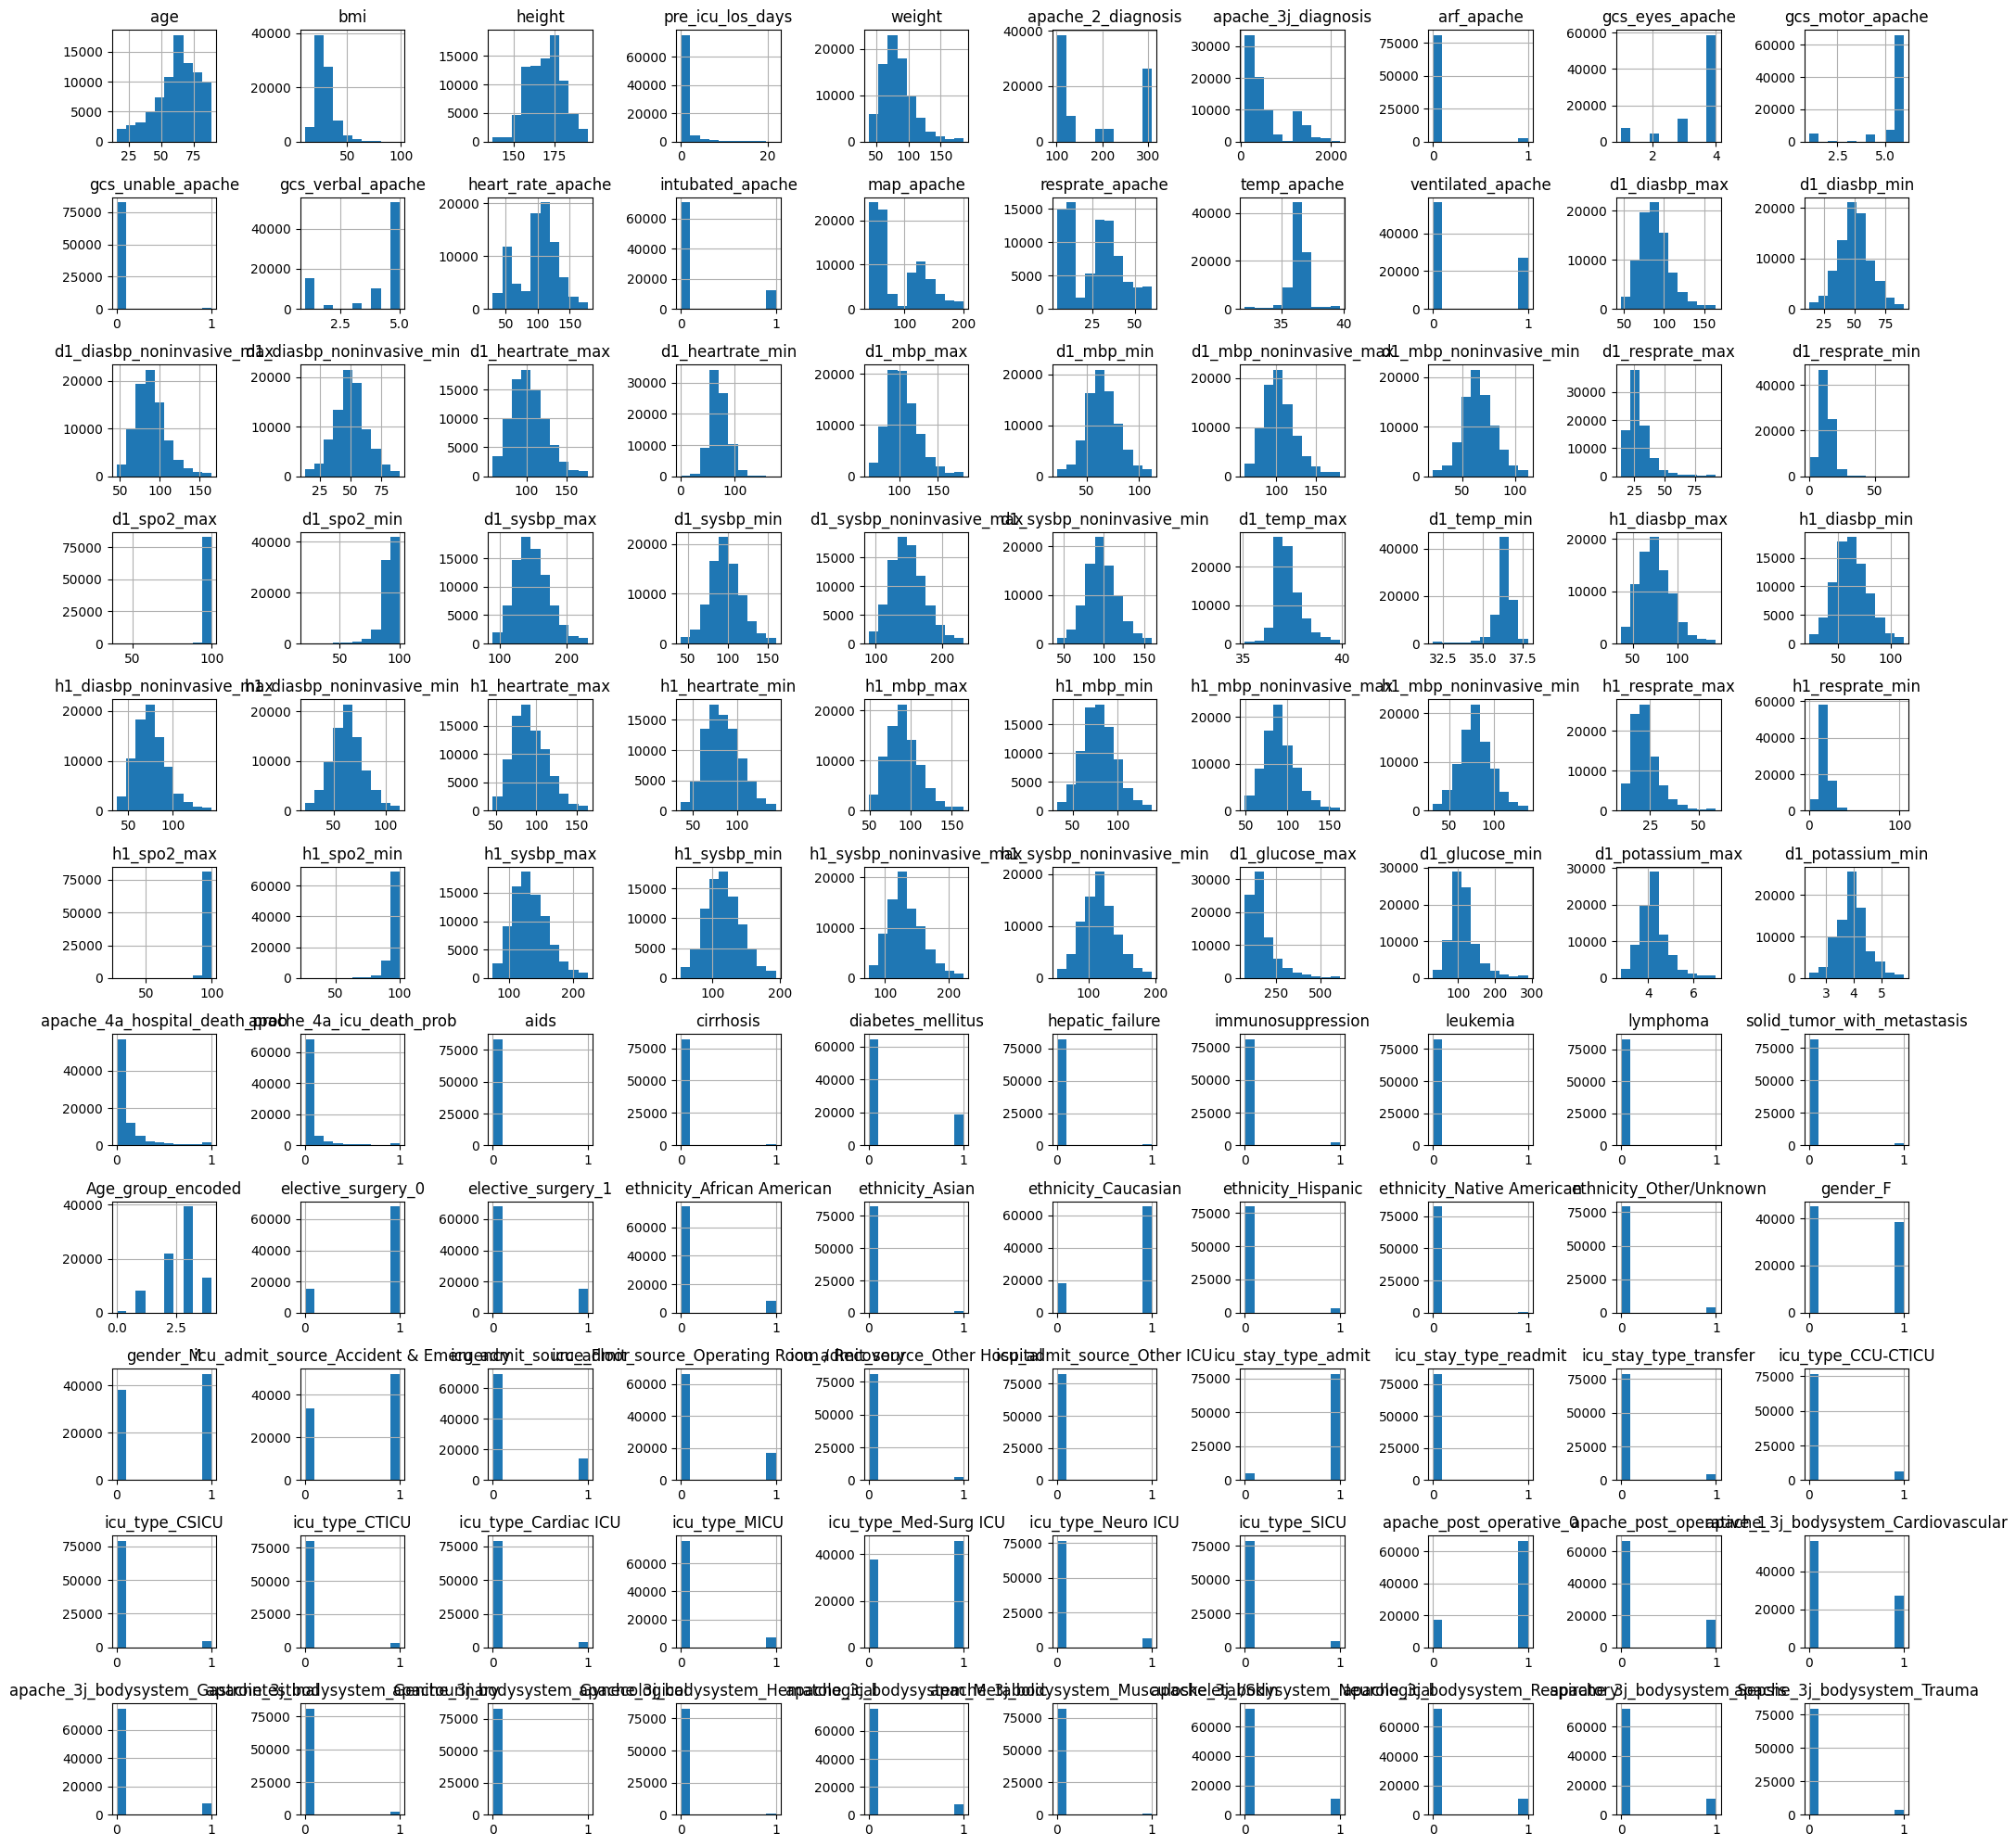

In [157]:
#Check the distrbution of features
X.hist(figsize=(25,25))
plt.subplots_adjust(wspace=0.8,hspace=0.5);

We can see that the range of features are very large, so I will standarlize the data first.

In [160]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
SS_scaler = StandardScaler()

# Fit SS_scaler to the data
SS_scaler.fit(X)

# Transform the data using the fitted scaler
X_scaled = pd.DataFrame(SS_scaler.transform(X), columns=X.columns)
X_scaled.head()

,age,bmi,height,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,arf_apache,gcs_eyes_apache,gcs_motor_apache,...,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma
0,0.344381,-0.795351,0.991286,-0.119578,-0.407311,-0.838887,-0.132437,-0.168825,-0.503972,0.405769,...,-0.333491,-0.157576,-0.059532,-0.083834,-0.306734,-0.114107,-0.391154,-0.385788,2.564306,-0.213585
1,0.890554,-0.210112,-0.895239,0.081702,-0.557284,-0.897061,-0.779417,-0.168825,-2.626780,-1.966745,...,-0.333491,-0.157576,-0.059532,-0.083834,-0.306734,-0.114107,-0.391154,2.592096,-0.389969,-0.213585
2,-2.265108,0.355383,0.285001,-0.401586,0.460103,-0.734173,0.302533,-0.168825,-0.503972,0.405769,...,-0.333491,-0.157576,-0.059532,-0.083834,3.260150,-0.114107,-0.391154,-0.385788,-0.389969,-0.213585
3,1.133297,-0.807489,-0.421284,-0.401586,-0.901818,0.208245,1.390932,-0.168825,0.557432,0.405769,...,-0.333491,-0.157576,-0.059532,-0.083834,-0.306734,-0.114107,-0.391154,-0.385788,-0.389969,-0.213585
4,0.283696,-0.193420,1.939195,-0.401586,0.650610,1.348456,-0.346654,-0.168825,0.557432,0.405769,...,-0.333491,-0.157576,-0.059532,-0.083834,-0.306734,-0.114107,2.556539,-0.385788,-0.389969,-0.213585


Let's Check the distribution again

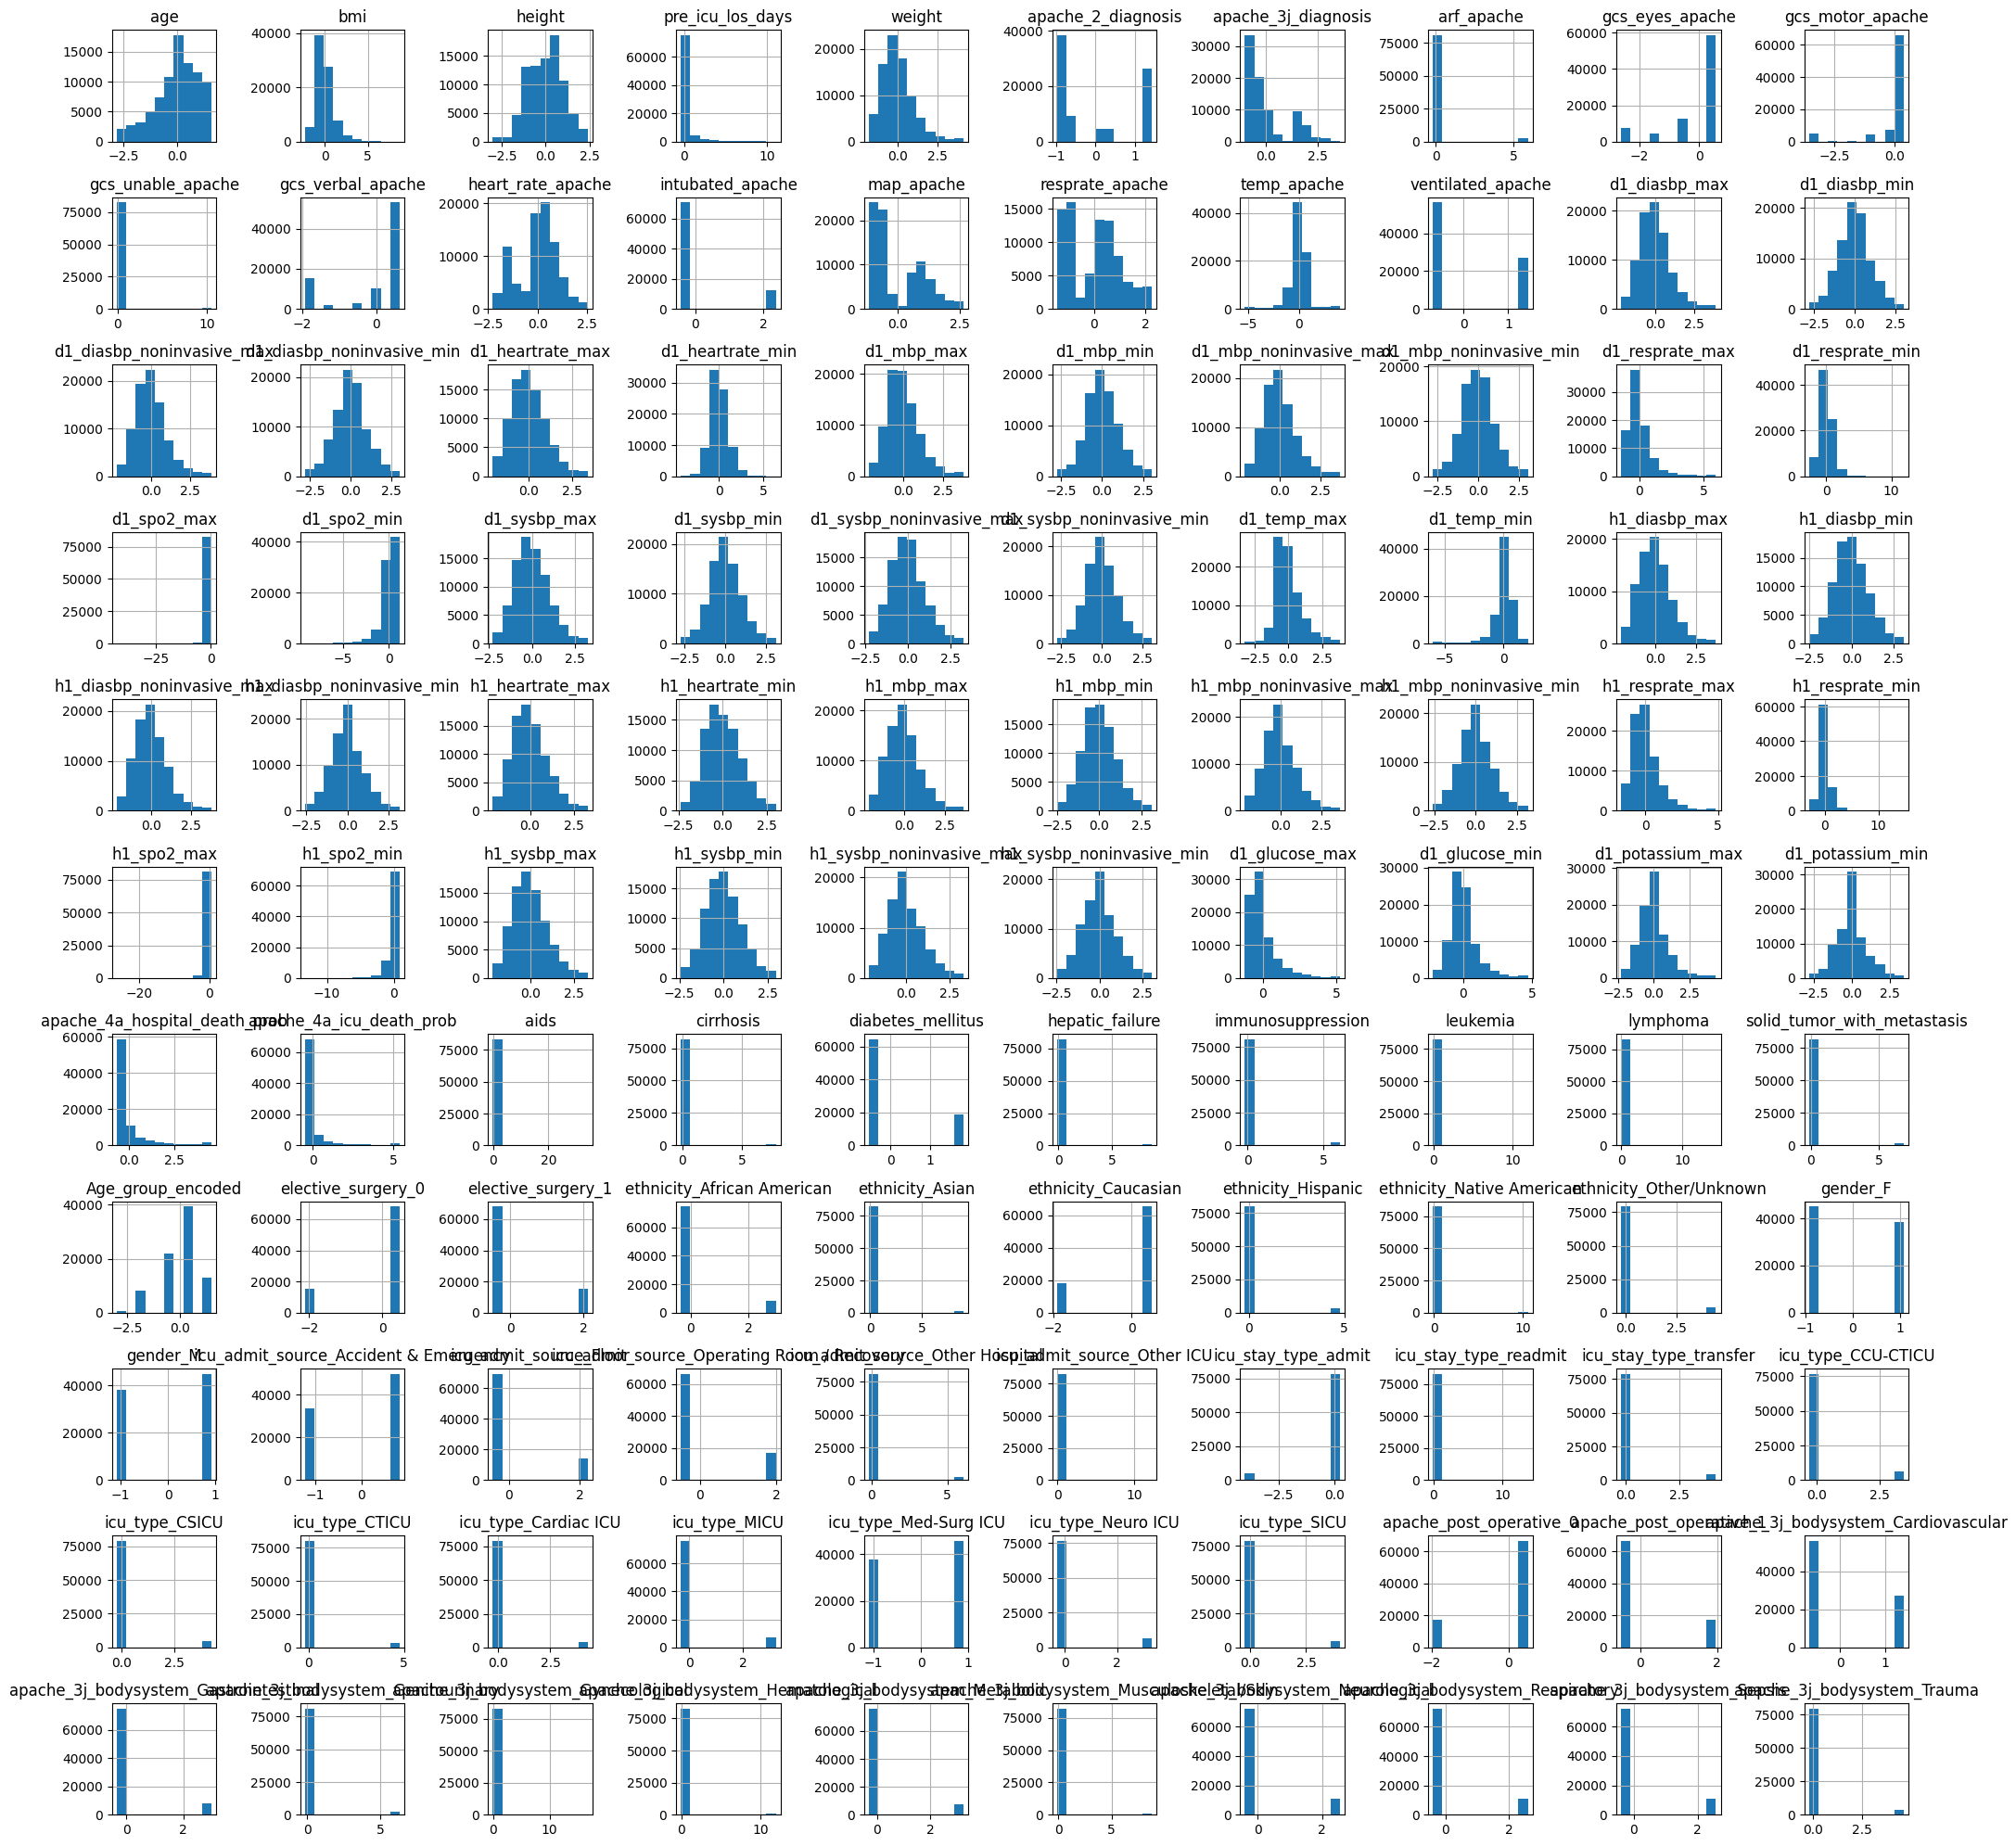

In [161]:
X_scaled.hist(figsize=(25,25))
plt.subplots_adjust(wspace=0.8,hspace=0.5);

## 6. Training Testing Split

From the EAD we did, we know that this dataset is supper unbanlanced, the target variable have large amount of 0. To make sure our model works well, we need to resample the data before the tarining testing split.

In [162]:
# use random oversampling to resample the data
from imblearn.over_sampling import RandomOverSampler

# Apply random oversampling to balance the classes
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_scaled, y)


lets check if y_resampled is balanced

In [163]:
y_resampled.value_counts()

hospital_death
0                 76455
1                 76455
Name: count, dtype: int64

Now we have a banlanced data, let's do the train/test split.

In [164]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, 
                                                    random_state=12)